## Analyze A/B Test Results Project

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 
For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df_converted= len(df.query('converted ==1 '))/len(df['converted'])
print(df_converted)

0.11965919355605512


In [6]:
#df.query('converted ==1 & landing_page =="new_page"').count()

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
new_page_n = df.query('group !="treatment" & landing_page =="new_page"')
treatment_n = df.query('group =="treatment" & landing_page !="new_page"')
no_times= len(new_page_n)+ len(treatment_n)
print(no_times)

3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  
Store your new dataframe in **df2**.

In [9]:
clean_df=df
clean_df = df[((df.group=='treatment') & (df.landing_page=='new_page')) | ((df.group=='control') & (df.landing_page=='old_page'))]
df2=clean_df

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
len(df2['user_id'].duplicated())

290585

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2=df2.drop_duplicates(subset=['user_id'], keep='first')

In [15]:
len(df2.duplicated())

290584

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df_convert= len(df2.query('converted ==1 '))/len(df2['converted'])
print(df_convert)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_group = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
print(control_group)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
print(treatment_group)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [19]:
received_new= len(df2.query('landing_page=="new_page"'))/len(df2['landing_page'])
print(received_new)

0.5000619442226688


e.Is there a sufficient evidence to conclude that the new treatment page leads to more conversions?


I can't say that there is enough evidance to conclude that there is more conversion in new treatment page.As we see in the previous Statistics not all of users has recievied the new page only half of them and the percent of converted users that recieved is very close about 12% control group.While about 11% treatment.So overall the conversion rate did not increase.but its a very small difference.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` For now, assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  
**$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: **$p_{new}$** - **$p_{old}$** <= 0
                                     
                                     
                                     
 H1: **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

-Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
pnew = len(df.query('converted ==1 '))/len(df['converted'])
print(pnew)

0.11965919355605512


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
pold = len(df.query('converted ==1 '))/len(df['converted'])
print(pold)

0.11965919355605512


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
no_treatment = len(df2.query('group=="treatment"'))
print(no_treatment)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
no_control = len(df2.query('group=="control"'))
print(no_control)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0, 1], no_treatment, p = [pnew, 1-pnew])
print(new_page_converted)

[1 0 1 ..., 1 1 1]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0, 1], no_control, p = [pold, 1-pold])
print(old_page_converted)

[1 1 1 ..., 1 1 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diff = new_page_converted.mean()-old_page_converted.mean()
print(p_diff)

0.000215467771097


In [28]:
pvalue_diff = pnew-pold
print(pvalue_diff)

0.0


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs=[]
for _ in range(10000):
    new= np.random.choice([0,1],no_treatment, replace=True, p= [pnew, 1-pnew])
    old= np.random.choice([0,1],no_control, replace=True, p= [pold, 1-pold])
    new_mean= new.mean()
    old_mean= old.mean()
    p_diffs.append(new_mean - old_mean)
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

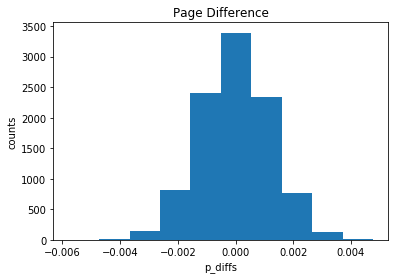

In [30]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.title ('Page Difference');
plt.xlabel('p_diffs');
plt.ylabel('counts');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
ab_new= df.query('group =="treatment"').converted.mean()
ab_old= df.query('group =="control"').converted.mean()
ab_diff= ab_new - ab_old
(p_diffs > ab_diff).mean()

0.88929999999999998

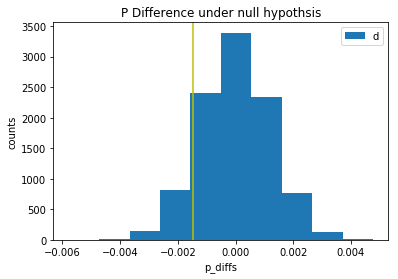

In [32]:
plt.hist(p_diffs);
plt.title ('P Difference under null hypothsis');
plt.xlabel('p_diffs');
plt.ylabel('counts');
plt.legend("difference between old and new");
plt.axvline(x=ab_diff, color='y');

What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The proportion of p-difference is about 89% .p-value is large, so the population is above diffrence which mean that the new-page is not doing better with comparison to the old one, the result is it would be better if we stick to the null hypothesis.

l. below  calculation the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer that the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm
from scipy.stats import norm
convert_old = len(df2.query('landing_page == "old_page" & converted == 1')) 
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [34]:
print('n_old',n_old)
print('n_new',n_new)

n_old 145274
n_new 145310


In [35]:
print('convert_old',convert_old)
print('convert_new',convert_new)

convert_old 17489
convert_new 17264


In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 
print(z_score,p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [37]:
print(norm.cdf(z_score))

0.905058312759


In [38]:
print(norm.ppf(1-(0.05)))

1.64485362695


It's mean null hypothesis of old page conversion rate is greater than the new page conversion.As the p-value is 0.9 and z-score equal to 1.3 (should be equal or more 1.644) less than critical value of 95% confidence,so as result we can't reject null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we have a 2 variable wethier converted or not so Logistic Regression is the suitable regression type.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.

In [39]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
model = sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results = model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [42]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 00:44 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Z,P-value = -1.3109 , 0.1899

Regression hypotheses is :

H0: pnew=pold

H1: pnew!=pold

while the hypotheses in part 2 is:

H0:  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  <= 0

H1:  𝑝𝑛𝑒𝑤  -  𝑝𝑜𝑙𝑑  > 0


The p-value is different from part 2. In part II the p-value is 0.9.This may be due to the regression model test that put an intercept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

I think it's good to consider other factors too because this may help to know other things could affect conversion rate.on the other side i think will be alittle bit complex and that could be the disadvantages.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in i will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.


In [43]:
countries_df = pd.read_csv('countries.csv')
df_cont = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_cont.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [44]:
df_cont.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [45]:
df_cont.describe()

,converted,intercept,control,treatment
count,290584.000000,290584.0,290584.000000,290584.000000
mean,0.119597,1.0,0.499938,0.500062
std,0.324490,0.0,0.500001,0.500001
min,0.000000,1.0,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000
50%,0.000000,1.0,0.000000,1.000000
75%,0.000000,1.0,1.000000,1.000000
max,1.000000,1.0,1.000000,1.000000


In [46]:
df_cont.groupby(['country']).mean()

,converted,intercept,control,treatment
country,,,,
CA,0.115318,1.0,0.496448,0.503552
UK,0.120594,1.0,0.501753,0.498247
US,0.119547,1.0,0.499541,0.500459


In [47]:
df_cont[['CA','UK', 'US']]= pd.get_dummies(df_cont['country'])


In [48]:
df_cont.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [53]:
#Create intercept column for the data set df_new
df_cont['intercept'] = 1

#Fit the model, CA as baseline so not included in lm
lm = sm.Logit(df_cont['converted'], df_cont[['intercept', 'US', 'UK']])
results = lm.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 00:45 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
df_cont = df_cont.rename(columns={'treatment': 'ab_page'})

In [59]:
df_cont['ab_UK'] = df_cont['ab_page'] * df_cont['UK']
df_cont['ab_CA'] = df_cont['ab_page'] * df_cont['CA']

In [60]:
df_cont['intercept'] = 1
logistic_reg = sm.Logit(df_cont['converted'], df_cont[['intercept','ab_page','CA','UK','ab_CA', 'ab_UK']])

In [61]:
results1= logistic_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [62]:
results1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-07 00:55 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_CA        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
ab_UK         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

<a name='conclusions'></a>

### Conclusions

-P-values has no signficant change.So we accept the Null Hypotheses.There is no evidence that new page increase the conversion rate with comparing to the old one.

-Also the countries coeffecient is very close (specially UK & US, canada is slightly differ) as whole can't say that interaction to pages is very different from each others.there is no indication for the user choice from the different 3 countries.

-At the end i didnt see any benifits from new page .we didn't need to implement it ,old page is doing well.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0